# 네이버영화평점분석
http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180909   
뒤의 날짜 정보만 변경하면서 데이터를 수집할 수 있다.

In [17]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd





In [18]:
import time





In [19]:
today_date = '20181130'
url_base = 'http://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.nhn?sel=cur&date='+today_date
page = urlopen(url_base+url_sub)
soup = BeautifulSoup(page,'html.parser')





In [4]:
# selct 말고 다른 방법을 써보자
#old_content > table > tbody > tr:nth-child(2) > td.title > div





In [20]:
soup.find_all('div','tit5')[:5] # div 클라스는tit5  5개만 표시





[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=144906" title="베일리 어게인">베일리 어게인</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=156464" title="보헤미안 랩소디">보헤미안 랩소디</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=178434" title="폴란드로 간 아이들">폴란드로 간 아이들</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=176354" title="번 더 스테이지: 더 무비">번 더 스테이지: 더 무비</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=76667" title="울지마 톤즈">울지마 톤즈</a>
 </div>]

In [21]:
# 1위 영화를 기준으로 영화 제목만 발췌
# div 클라스 tit5 를 리스트로 가져와서 0번째의 a태그를 스트링으로 가져와라
soup.findAll('div','tit5')[0].a.string





'베일리 어게인'

In [22]:
# 1위 영화를 기준으로 평점 발췌
soup.findAll('td','point')[0].string





'9.63'

In [43]:
# 데이터의 범위 생성, 현재일 기준으로 30일 전 데이터 생성
# ("2018-4-1", "2018-4-30", freq="B") 1일부터 30일까지 모두 출력
date = pd.date_range("2012-9-1", "2012-12-30",freq='B')
date





DatetimeIndex(['2012-09-03', '2012-09-04', '2012-09-05', '2012-09-06',
               '2012-09-07', '2012-09-10', '2012-09-11', '2012-09-12',
               '2012-09-13', '2012-09-14', '2012-09-17', '2012-09-18',
               '2012-09-19', '2012-09-20', '2012-09-21', '2012-09-24',
               '2012-09-25', '2012-09-26', '2012-09-27', '2012-09-28',
               '2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12', '2012-10-15', '2012-10-16',
               '2012-10-17', '2012-10-18', '2012-10-19', '2012-10-22',
               '2012-10-23', '2012-10-24', '2012-10-25', '2012-10-26',
               '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01',
               '2012-11-02', '2012-11-05', '2012-11-06', '2012-11-07',
               '2012-11-08', '2012-11-09', '2012-11-12', '2012-11-13',
               '2012-11-14', '2012-11-15', '2012-11-16', '2012-11-19',
      

# 30일 간의 정보 획득

In [44]:
import urllib
url_base = 'http://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'

movie_date=[]
movie_name=[]
movie_point=[]

for today in date:
    html=url_base+url_sub
    response=urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))# date의 - 를 빼고 숫자만 문자로 들어감
    soup = BeautifulSoup(response,'html.parser')
    end = len(soup.findAll('td','point')) # 해당 일자에 있는 영화 갯수를 평점개수로 파악하기
    movie_date.extend([today for n in range(0,end)])
    movie_name.extend([soup.findAll('div','tit5')[n].a.get_text() for n in range(0,end)]) # string text get_text 모두 쓸 수 있음
    movie_point.extend([float(soup.findAll('td','point')[n].get_text()) for n in range(0,end)])
    print(today)













2012-09-03 00:00:00
2012-09-04 00:00:00
2012-09-05 00:00:00
2012-09-06 00:00:00
2012-09-07 00:00:00
2012-09-10 00:00:00
2012-09-11 00:00:00
2012-09-12 00:00:00
2012-09-13 00:00:00
2012-09-14 00:00:00
2012-09-17 00:00:00
2012-09-18 00:00:00
2012-09-19 00:00:00
2012-09-20 00:00:00
2012-09-21 00:00:00
2012-09-24 00:00:00
2012-09-25 00:00:00
2012-09-26 00:00:00
2012-09-27 00:00:00
2012-09-28 00:00:00
2012-10-01 00:00:00
2012-10-02 00:00:00
2012-10-03 00:00:00
2012-10-04 00:00:00
2012-10-05 00:00:00
2012-10-08 00:00:00
2012-10-09 00:00:00
2012-10-10 00:00:00
2012-10-11 00:00:00
2012-10-12 00:00:00
2012-10-15 00:00:00
2012-10-16 00:00:00
2012-10-17 00:00:00
2012-10-18 00:00:00
2012-10-19 00:00:00
2012-10-22 00:00:00
2012-10-23 00:00:00
2012-10-24 00:00:00
2012-10-25 00:00:00
2012-10-26 00:00:00
2012-10-29 00:00:00
2012-10-30 00:00:00
2012-10-31 00:00:00
2012-11-01 00:00:00
2012-11-02 00:00:00
2012-11-05 00:00:00
2012-11-06 00:00:00
2012-11-07 00:00:00
2012-11-08 00:00:00
2012-11-09 00:00:00


In [45]:
# dataFrame으로 변환 - 딕셔너리로 만들면 컬럼과 함께 바로 지정 가능
movie = pd.DataFrame(
        {
            'date':movie_date,
            'name':movie_name,
            'point':movie_point,
        }
)
movie.head()









,date,name,point
0,2012-09-03,바람과 함께 사라지다,9.26
1,2012-09-03,본 얼티메이텀,9.23
2,2012-09-03,이티,9.16
3,2012-09-03,미운 오리 새끼,9.12
4,2012-09-03,다크 나이트 라이즈,9.00


In [46]:
movie





,date,name,point
0,2012-09-03,바람과 함께 사라지다,9.26
1,2012-09-03,본 얼티메이텀,9.23
2,2012-09-03,이티,9.16
3,2012-09-03,미운 오리 새끼,9.12
4,2012-09-03,다크 나이트 라이즈,9.00
5,2012-09-03,죠스,8.99
6,2012-09-03,명탐정 코난:11번째 스트라이커,8.91
7,2012-09-03,스텝업4 : 레볼루션,8.90
8,2012-09-03,"그 시절, 우리가 좋아했던 소녀",8.86
9,2012-09-03,새미의 어드벤쳐 2,8.85


---------------------------------
# 영화분석

In [47]:
# 영화별 점수 함산 구하기
import numpy as np # 넘파이가 숫자관련 함수는 훨씬 파름 pd는 np로 넘어가서 결과를 가져옴
movie_unique = pd.pivot_table(movie,index=['name'],aggfunc=np.sum)





In [48]:
movie_best=movie_unique.sort_values(by='point',ascending=False)





In [28]:
# 영화 이름으로 날짜별 변환 검색
tmp = movie.query('name == ["보헤미안 랩소디"]')
tmp.head()





,date,name,point
0,2018-11-01,보헤미안 랩소디,9.71
37,2018-11-02,보헤미안 랩소디,9.70
75,2018-11-03,보헤미안 랩소디,9.70
114,2018-11-04,보헤미안 랩소디,9.70
151,2018-11-05,보헤미안 랩소디,9.69


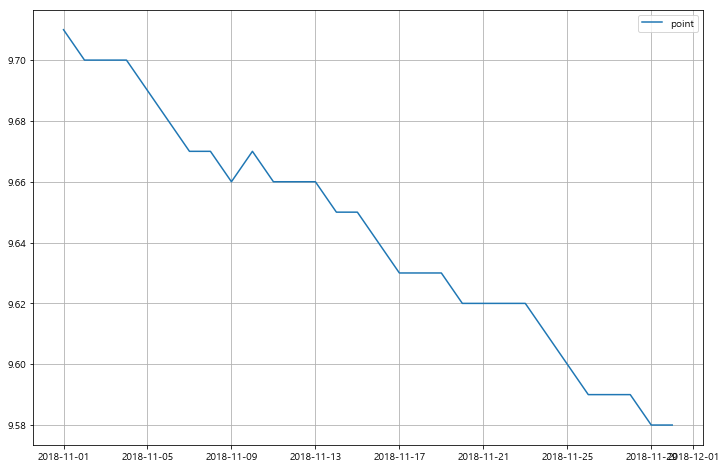

In [49]:
# matplotlib을 이용한 시각화
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (12,8))
plt.plot(tmp['date'],tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()









# 50개 영화에 대한 평점 변화 확인하기

In [50]:
movie_pivot = pd.pivot_table(movie, index = ['date'], columns=['name'], values=['point'])
movie_pivot.head()





point                                                         \
name       007 스카이폴 19곰 테드 26년 577 프로젝트 MB의 추억 가디언즈 가문의 영광5-가문의 귀환 가위손  간첩   
date                                                                         
2012-09-03      NaN    NaN NaN     8.73    NaN  NaN            NaN NaN NaN   
2012-09-04      NaN    NaN NaN     8.67    NaN  NaN            NaN NaN NaN   
2012-09-05      NaN    NaN NaN     8.64    NaN  NaN            NaN NaN NaN   
2012-09-06      NaN    NaN NaN     8.61    NaN  NaN            NaN NaN NaN   
2012-09-07      NaN    NaN NaN     8.62    NaN  NaN            NaN NaN NaN   

                         ...                                              \
name       강철대오: 구국의 철가방 ... 파라노말 액티비티 4  파파 피에타 헬로우 고스트 호빗 : 뜻밖의 여정  화차   
date                     ...                                               
2012-09-03           NaN ...         NaN NaN NaN     NaN         NaN NaN   
2012-09-04           NaN ...         NaN NaN NaN     NaN         NaN NaN   
2012-09-05           NaN ...         NaN NaN NaN     NaN         NaN NaN   
2012-09-06           NaN ...         NaN NaN NaN     NaN         NaN NaN   
2012-09-07           NaN ...         NaN NaN NaN     NaN         NaN NaN   

                                     
name       황색 눈물 회사원 후궁 : 제왕의 첩  휴고  
date                                 
2012-09-03   NaN NaN        NaN NaN  
2012-09-04   NaN NaN        NaN NaN  
2012-09-05   NaN NaN        NaN NaN  
2012-09-06   NaN NaN        NaN NaN  
2012-09-07   NaN NaN        NaN NaN  

[5 rows x 158 columns]

In [51]:
# point 컬럼 제거
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()





name,007 스카이폴,19곰 테드,26년,577 프로젝트,MB의 추억,가디언즈,가문의 영광5-가문의 귀환,가위손,간첩,강철대오: 구국의 철가방,...,파라노말 액티비티 4,파파,피에타,헬로우 고스트,호빗 : 뜻밖의 여정,화차,황색 눈물,회사원,후궁 : 제왕의 첩,휴고
date,,,,,,,,,,,,,,,,,,,,,
2012-09-03,NaN,NaN,NaN,8.73,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-04,NaN,NaN,NaN,8.67,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-05,NaN,NaN,NaN,8.64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-06,NaN,NaN,NaN,8.61,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-07,NaN,NaN,NaN,8.62,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# 한글 폰트 문제 해결
# matplotlib은 한글 폰트를 지원하지 않음
# os 정보
import platform
# font_manaver : 폰트관리 모듈
# rx : 폰트 변경 모듈
from matplotlib import font_manager,rc
# 시각화 도구
from matplotlib import pyplot as plt
%matplotlib inline

# unicode 설정
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font', family='AppleGothic') # os가 mac oc
elif platform.system()=='Windows':
    path='c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print("Unknown System")













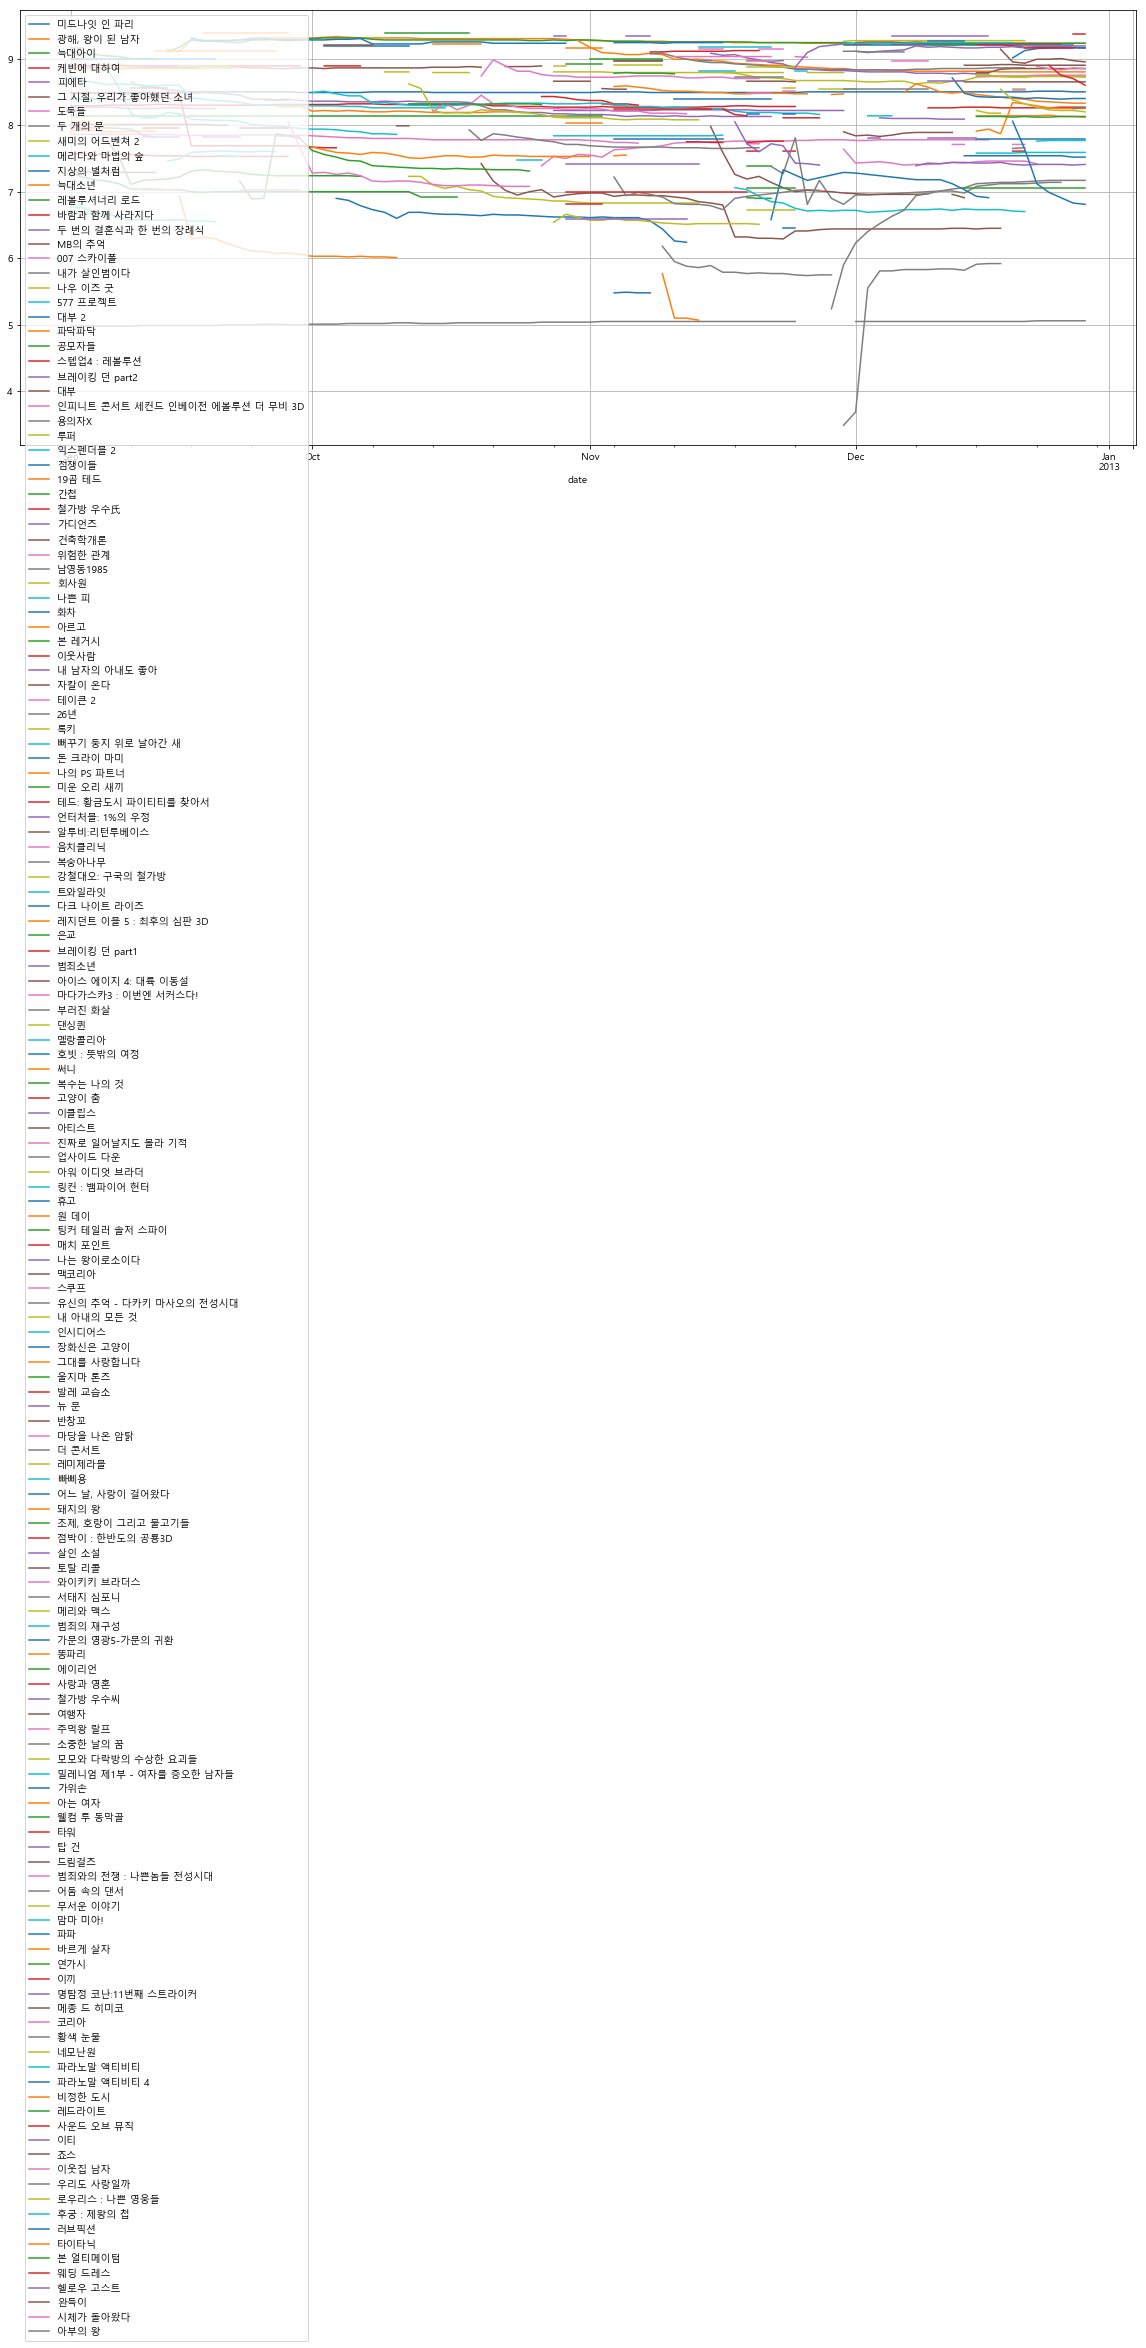

In [52]:
# movie_pivot.plot(y=movie_best.index, figsize=(20,8)) 전체보기
# movie_pivot.plot(y=movie_best.index[:10], figsize=(20,8)) # movie_best의 index순으로 10개만 보겠다.
# 바울,베놈,폴란드로 간 아이들,너의 췌장을 먹고 싶어 만 보겠다
movie_pivot.plot(y=movie_best.index, figsize=(20,8))
plt.legend(loc='best')
plt.grid()
plt.show()







